# <font color='red'> **EDA:**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
import datetime
import statistics as stat
from random import randint
import decimal


# **I. INGRESOS TOTALES**

In [2]:
df0 = pd.read_excel('./PI 2/Internet.xlsx', sheet_name = 'Ingresos ')
df0.head(3)

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023


In [3]:
df0.columns

Index(['Año', 'Trimestre', 'Ingresos (miles de pesos)', 'Periodo'], dtype='object')

#### Podemos ver que corresponde a una SERIE DE TIEMPO.
#### Para verla en un gráfico de línea, se necesita:
#### I.1) Ordenar x fecha, en este caso, se usará una combinación: año-trimestre.
#### I.2) Conversión de moneda a dólares: esto es ya que la moneda argentina se ve afectada fuertemente por la inflación, de ahi que elegir un cambio de moneda podría ser lo más adecuado para representar la evolución real de los ingresos.


### **I.1) Crear columna datatime:**

In [4]:
df0['datetime'] = np.nan #Se crea la columna con valores nulos
row = np.shape(df0)[0]
i = 0

while i < row:

    df0.loc[i, 'datetime'] = df0.loc[i, 'Año'].astype(str)+ '-' + df0.loc[i, 'Trimestre'].astype(str)
    i += 1

# Ordenando por 'datetime':
df0 = df0.sort_values(by = 'datetime')


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22232\237201327.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024-2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df0.loc[i, 'datetime'] = df0.loc[i, 'Año'].astype(str)+ '-' + df0.loc[i, 'Trimestre'].astype(str)


In [5]:
df0.head(3)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,datetime
41,2014,1,2.984054e+06,Ene-Mar 2014,2014-1
40,2014,2,3.270816e+06,Abr-Jun 2014,2014-2
39,2014,3,3.478638e+06,Jul-Sept 2014,2014-3


#### Resetando el indice:

In [ ]:
df0 = df0.reset_index()
df0 = df0.drop(by = ['index', 'Periodo'], axis = 1)

In [586]:
df0.head(5)

,Año,Trimestre,Ingresos (miles de pesos),datetime
0,2014,1,2.984054e+06,2014-1
1,2014,2,3.270816e+06,2014-2
2,2014,3,3.478638e+06,2014-3
3,2014,4,3.950441e+06,2014-4
4,2015,1,4.876385e+06,2015-1


#### Graficando la serie de tiempo:

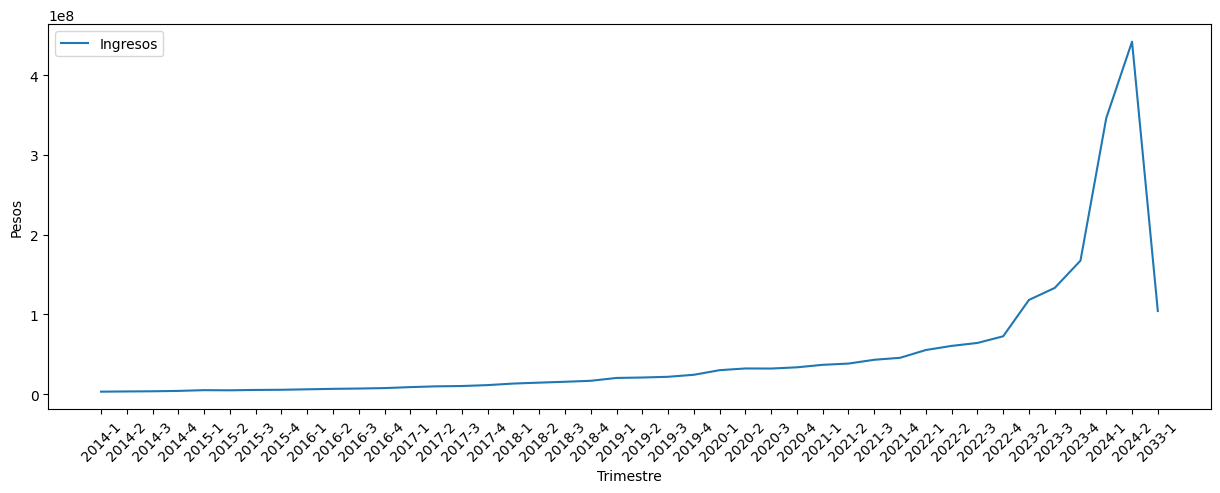

In [6]:
plt.figure(figsize = (15,5))

plt.plot(df0['datetime'], df0['Ingresos (miles de pesos)'], label = 'Ingresos')
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Trimestre')
plt.ylabel('Pesos')
#plt.ylim(-10,40)
plt.show()

### **Algunas observaciones:**

##### I.1.a) Parece haber valores de trimestres faltantes: 2023-1. Sin embargo, existe un datatime 2033-1, lo más probable es que sea un error de escritura, por lo que se usará ese datetime para el 2023-1.


### **I.1.a) Missing value**

In [9]:
df0[df0['datetime'] == '2023-1']

,Año,Trimestre,Ingresos (miles de pesos),Periodo,datetime


##### Como se ve, el valor no existe. Los datos del periodo 2033-1 serán la fila faltante:

In [11]:
row = df0.index[df0['datetime'] == '2033-1'][0]
df0.loc[row]

Año                                  2033
Trimestre                               1
Ingresos (miles de pesos)    104134992.81
Periodo                      Ene-Mar 2023
datetime                           2033-1
Name: 5, dtype: object

#### Se convierte la fila 2033-1 en la 2023-1, y se ordena por trimestre:

In [ ]:
df0['datetime'].loc[df0['datetime'] == '2033-1', ]  ='2023-1'
df0['Año'].loc[df0['datetime'] == '2033-1']  ='2023'

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22232\198575802.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df0['datetime'].loc[df0['datetime'] == '2033-1', ]  ='2023-1'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22232\198575802.py:

In [27]:
df0['Año'].loc[df0['datetime'] == '2023-1']  ='2023'

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22232\1658851373.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df0['Año'].loc[df0['datetime'] == '2023-1']  ='2023'
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22232\1658851373.py:1: Sett

In [ ]:
df0 = df0.sort_values('datetime')
df0 = df0.reset_index()
df0 = df0.drop('index', axis = 1)

In [37]:
df0

,Año,Trimestre,Ingresos (miles de pesos),Periodo,datetime
0,2014,1,2.984054e+06,Ene-Mar 2014,2014-1
1,2014,2,3.270816e+06,Abr-Jun 2014,2014-2
2,2014,3,3.478638e+06,Jul-Sept 2014,2014-3
3,2014,4,3.950441e+06,Oct-Dic 2014,2014-4
4,2015,1,4.876385e+06,Ene-Mar 2015,2015-1
5,2015,2,4.701791e+06,Abr-Jun 2015,2015-2
6,2015,3,5.153739e+06,Jul-Sept 2015,2015-3
7,2015,4,5.376899e+06,Oct-Dic 2015,2015-4
8,2016,1,5.936845e+06,Ene-Mar 2016,2016-1
9,2016,2,6.534241e+06,Abr-Jun 2016,2016-2


### **Graficamos nuevamente la serie de tiempo:**

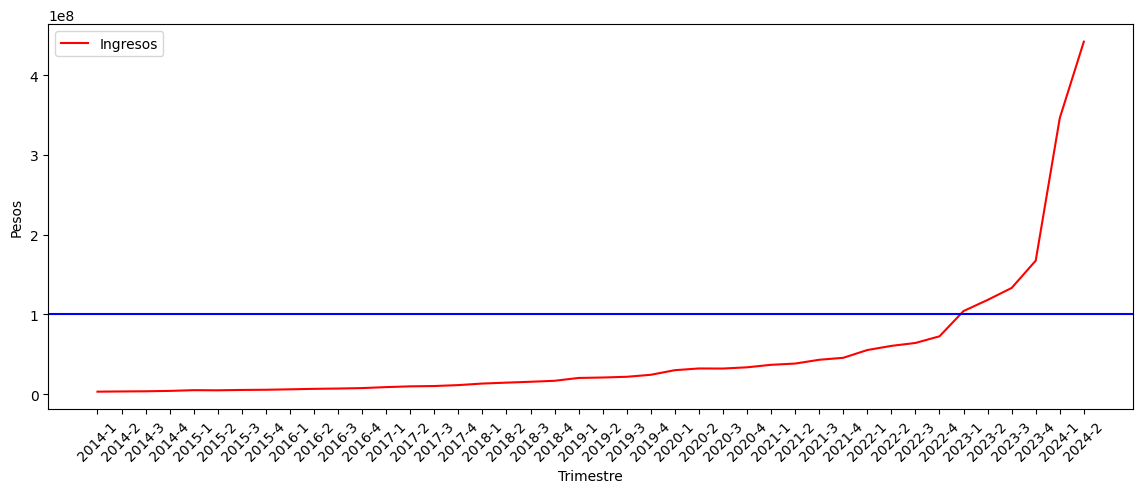

In [38]:
plt.figure(figsize = (14,5))

#Serie de tiempo
plt.plot(df0['datetime'], df0['Ingresos (miles de pesos)'], label = 'Ingresos', color = 'r')
#Linea horizontal
plt.axhline(y=1e8, color='b', linestyle='-')

plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Trimestre')
plt.ylabel('Pesos')
#plt.ylim(-10,40)
plt.show()

In [39]:
df0.to_csv('./PI 2/Ingresos.csv')

### **I.2) Ajuste por inflación:**

#### Los ingresos expresados en pesos, se volverán a recalcular considerando el valor de IPC de su correspondiente año
#### Tomamos información sobre el IPC de:
#### > https://es.tradingeconomics.com/argentina/inflation-cpi

In [157]:
IPC = {'2014':23.91, '2015':26.9, '2016':40.5, '2017':24.8, '2018':47.6, '2019':53.8, '2020':36.1, '2021':50.9, '2022':94.8, '2023':211.4, '2024':193}

In [184]:
def ajuste_inf(valor, ipc_valor, ipc_actual):

    factor = (ipc_actual/ipc_valor - 1)
    valor_actual = valor*(1+factor)

    return valor_actual

In [178]:
df0['Ingresos (millones de pesos)'] = np.nan
df0.head(5)

,Año,Trimestre,Ingresos (miles de pesos),Periodo,datetime,Ingresos (millones de pesos)
0,2014,1,2.984054e+06,Ene-Mar 2014,2014-1,NaN
1,2014,2,3.270816e+06,Abr-Jun 2014,2014-2,NaN
2,2014,3,3.478638e+06,Jul-Sept 2014,2014-3,NaN
3,2014,4,3.950441e+06,Oct-Dic 2014,2014-4,NaN
4,2015,1,4.876385e+06,Ene-Mar 2015,2015-1,NaN


In [189]:
rows = np.shape(df0)[0]
i = 0

while i < rows:

    year = df0.loc[i, 'Año']
    df0.loc[i, 'Ingresos (millones de pesos)'] = ajuste_inf(df0.loc[i, 'Ingresos (miles de pesos)'], IPC[str(year)], IPC['2024'])
    df0.loc[i, 'Ingresos (millones de pesos)'] = round(df0.loc[i, 'Ingresos (millones de pesos)']*10E3/10E6, 1)

    i += 1



### **Graficamos nuevamente la serie de tiempo:**

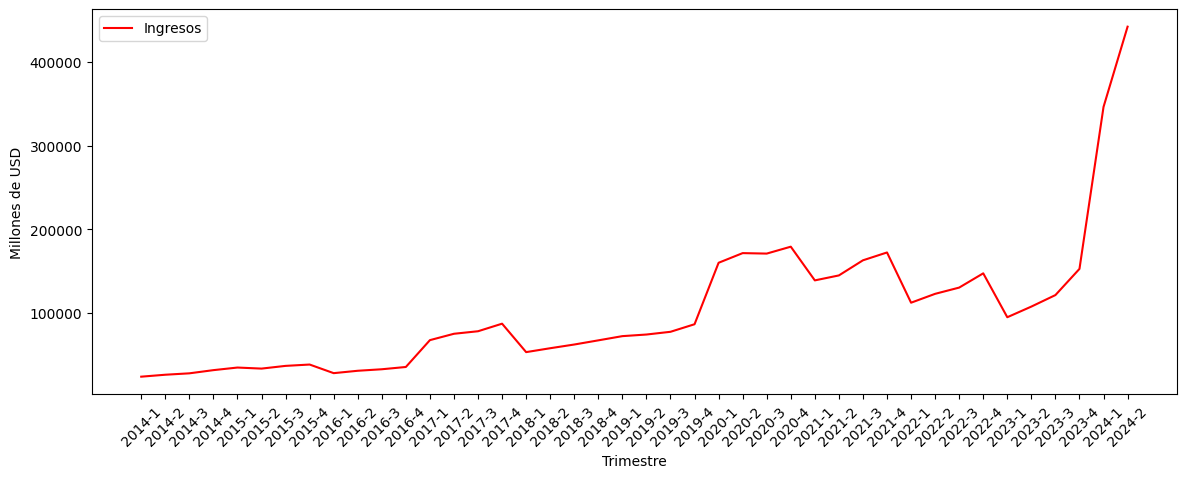

In [193]:
plt.figure(figsize = (14,5))

#Serie de tiempo
plt.plot(df0['datetime'], df0['Ingresos (millones de pesos)'], label = 'Ingresos', color = 'r')
#Linea horizontal
#plt.axhline(y=1e8, color='b', linestyle='-')

plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Trimestre')
plt.ylabel('Millones de USD')
#plt.ylim(-10,40)
plt.show()

#### Se hace nuevamente un boxplot para ver como queda la distribución de los datos una vez hechas las correciones:

<Axes: ylabel='Ingresos (millones de pesos)'>

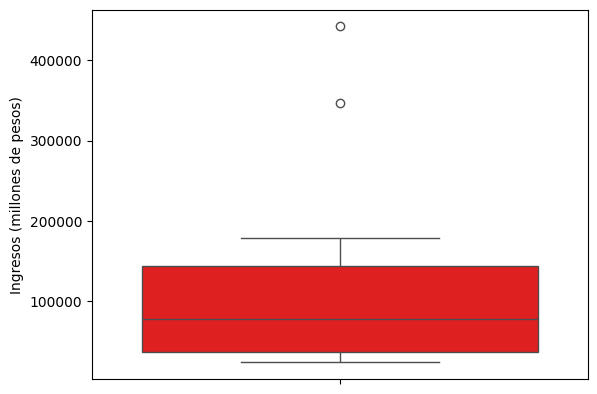

In [194]:
sns.boxplot(data = df0['Ingresos (millones de pesos)'], fill = True, color = 'r')

In [196]:
df0.to_csv('./PI 2/Ingresos.csv')

# **II. PENETRACIÓN HOGARES**: 
### Análisis de la métrica "acceso cada 100 hogares" por Provincia

In [ ]:
#df1 = pd.read_csv('./PI 2/Penetracion-hogares.csv') #,index_col=0, encoding='latin-1')
#df1.columns
df1 = pd.read_excel('./PI 2/Internet.xlsx', sheet_name = 'Penetracion-hogares')
df1.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81


#### Agregando una nueva columna "datetime", para manejarlo como serie de tiempo:

In [ ]:
df1['datetime'] = np.nan #se inicializa la columna con valores no nulos
df1.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares',
       'datetime'],
      dtype='object')

#### Se rellenan los valores de la columna "datetime" con valores reales

In [200]:
row = np.shape(df1)[0]
i = 0

while i < row:

    #df1['datetime'].iloc[i] = df1['Año'].iloc[i].astype(str) + '-' + df1['Trimestre'].iloc[i].astype(str)
    df1.loc[i,'datetime'] = df1.loc[i,'Año'].astype(str) + '-' + df1.loc[i, 'Trimestre'].astype(str)

    i += 1

df1.head(5)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22232\3386774033.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2024-2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[i,'datetime'] = df1.loc[i,'Año'].astype(str) + '-' + df1.loc[i, 'Trimestre'].astype(str)


,Año,Trimestre,Provincia,Accesos por cada 100 hogares,datetime
0,2024,2,Buenos Aires,79.84,2024-2
1,2024,2,Capital Federal,116.37,2024-2
2,2024,2,Catamarca,68.81,2024-2
3,2024,2,Chaco,44.06,2024-2
4,2024,2,Chubut,86.33,2024-2


#### Ordenamos por Provincia & datetime, luego se resetean los indices:

In [ ]:
df1 = df1.sort_values(by = ['Provincia', 'datetime'])
df1 = df1.reset_index()
df1 = df1.drop(['index'], axis = 1)
df1.head(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,datetime
0,2014,1,Buenos Aires,54.570073,2014-1
1,2014,2,Buenos Aires,55.061417,2014-2
2,2014,3,Buenos Aires,56.754739,2014-3
3,2014,4,Buenos Aires,56.094337,2014-4
4,2015,1,Buenos Aires,56.370484,2015-1


In [203]:
df1.to_csv('./PI 2/Penetracion-hogares.csv')

###  **II.1) Transformando:**
#### Con el dataset resultante, se creará uno nuevo, donde cada columna sea una provincia y represente el valor de:
#### > 'Acceso por cada...'


#### borrando columnas no necesarias:

In [204]:
df1 = df1.drop(['Año', 'Trimestre'], axis = 1)
df1.head(5)

,Provincia,Accesos por cada 100 hogares,datetime
0,Buenos Aires,54.570073,2014-1
1,Buenos Aires,55.061417,2014-2
2,Buenos Aires,56.754739,2014-3
3,Buenos Aires,56.094337,2014-4
4,Buenos Aires,56.370484,2015-1


#### Creamos un dataset inicial, al cual luego se le irán concatenando el resto de provincias:

In [205]:
#------------------------------------
#Creating the inicial dataset
#------------------------------------

provincias = df1['Provincia'].unique() # List with all the provinces in the dataset (24), will be ued al labels (columns) after
row_datetime = df1['datetime'].unique() # indexes

# initial dataset -----
accesos_hogares = df1[df1['Provincia'] == provincias[0]]
accesos_hogares = accesos_hogares.set_index('datetime')
accesos_hogares = accesos_hogares.rename(columns={'Accesos por cada 100 hogares':provincias[0]})
accesos_hogares = accesos_hogares.drop(['Provincia'], axis = 1) # Deleting columnn "provincia"

#------------------------------------
# Concatenate the rest of the data
#------------------------------------

n_datasets = len(provincias)
i = 1 # not zero, because that value was used to create the initial one

while i < n_datasets:

    add_dataset = df1[df1['Provincia'] == provincias[i]]
    add_dataset = add_dataset.set_index('datetime')
    add_dataset = add_dataset.rename(columns={'Accesos por cada 100 hogares':provincias[i]})
    add_dataset = add_dataset.drop(['Provincia'], axis = 1) # Deleting columnn "provincia"

    #Concatenate the new dataset -------------
    accesos_hogares = pd.concat([accesos_hogares, add_dataset], axis=1)
    i += 1

In [206]:
accesos_hogares.head(5)

,Buenos Aires,Capital Federal,Catamarca,Chaco,Chubut,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán
datetime,,,,,,,,,,,,,,,,,,,,,
2014-1,54.570073,112.254123,24.251751,20.718539,41.235218,22.316717,52.517848,34.367122,17.418451,18.415352,...,49.791605,44.913957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-2,55.061417,113.143352,24.703119,20.957996,41.410210,22.575613,53.448126,34.687432,17.540412,18.706061,...,50.842749,45.334910,28.914594,27.782698,9.717910,29.377007,48.390351,16.695567,64.356045,33.944527
2014-3,56.754739,113.800512,24.706121,21.112667,40.598671,22.787535,54.233610,34.981647,17.771315,18.368534,...,56.395411,46.196187,29.222684,27.854244,9.711211,28.231943,49.195884,16.492204,65.686102,33.943756
2014-4,56.094337,114.896766,25.513779,21.870783,40.249275,23.562431,54.696897,36.025471,17.956311,19.599418,...,52.554990,45.478063,29.534862,28.037146,9.786393,27.802679,49.999623,17.269202,66.137819,35.320875
2015-1,56.370484,114.896997,25.109466,26.649591,37.612781,28.950191,54.697347,42.065193,18.122704,19.689714,...,51.954437,45.326949,30.009788,27.553193,9.716049,27.994864,50.244495,17.055817,74.234952,35.078607


In [207]:
accesos_hogares.to_csv('./PI 2/Penetracion_hogares.csv')

### **PLOT**: para comprar, se colocarán las curvas de cada provincia en la misma gráfica (plot)

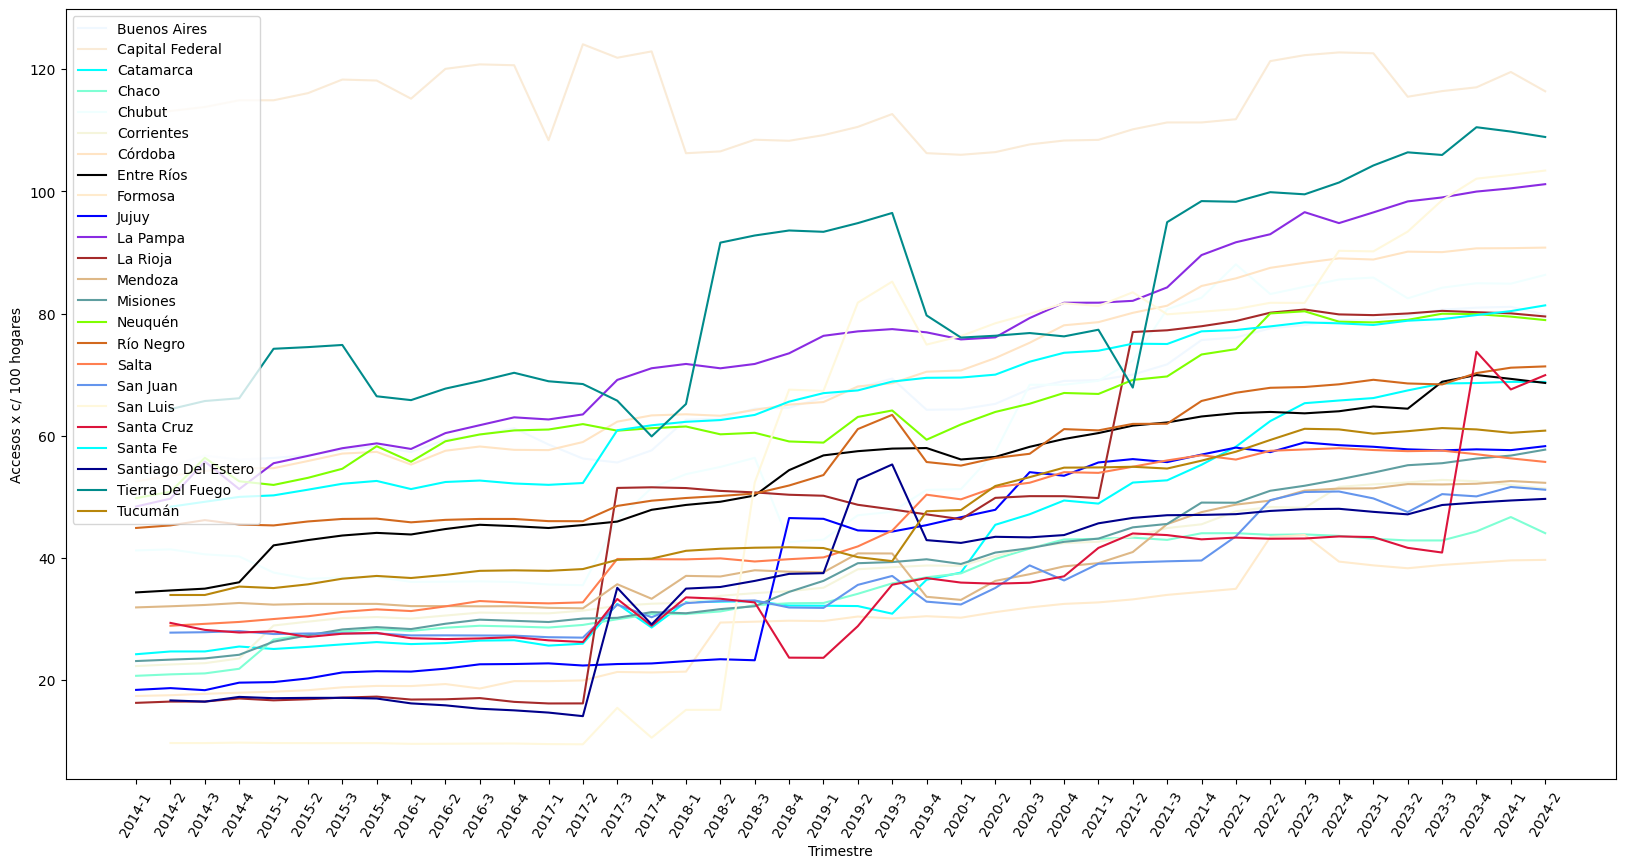

In [209]:
#-----------------------------------
#Creating a list of different color:
#-----------------------------------
colors = []
n_colors = n_datasets

for name, hex in matplotlib.colors.cnames.items():
    colors.append(hex)

#-----------------------------------
#Creating the plots
#-----------------------------------

plt.figure(figsize = (20,10)) 

k = 0
while k < n_datasets:
    
    value = provincias[k]
    colored = colors[k]
    plt.plot(accesos_hogares.index, accesos_hogares[value], label = value, color = colored)

    k += 1


plt.xticks(rotation=60)
plt.legend(loc="upper left")
plt.xlabel('Trimestre')
plt.ylabel('Accesos x c/ 100 hogares')
#plt.ylim(-10,40)

plt.show()

#### Podemos ver que en todas las provincias:
##### > Hay una tendencia creciente en las "conexiones cada 100 hogares", incluso si no sabemos qué tipo de tecnología logra dicha conexión, lo cierto es que va en aumento.
### **II.2) Calculo de KPI:**
#### KPI = ((Nuevo acceso - Acceso actual) / Acceso actual) * 100$
#### El mismo se verá reflejado al lado de la columna de cada provincia.


#### II.2.a) Checando valores faltantes:

In [210]:
accesos_hogares.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 2014-1 to 2024-2
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Buenos Aires         42 non-null     float64
 1   Capital Federal      42 non-null     float64
 2   Catamarca            42 non-null     float64
 3   Chaco                42 non-null     float64
 4   Chubut               42 non-null     float64
 5   Corrientes           42 non-null     float64
 6   Córdoba              42 non-null     float64
 7   Entre Ríos           42 non-null     float64
 8   Formosa              42 non-null     float64
 9   Jujuy                42 non-null     float64
 10  La Pampa             42 non-null     float64
 11  La Rioja             42 non-null     float64
 12  Mendoza              42 non-null     float64
 13  Misiones             42 non-null     float64
 14  Neuquén              42 non-null     float64
 15  Río Negro            42 non-null     f

##### Puede verse que hay valores nulos, desde Salta (index 16) hasta Tucumán (indice 23):

In [212]:
accesos_hogares[provincias[16:24]].head(5)

,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán
datetime,,,,,,,,
2014-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-2,28.914594,27.782698,9.717910,29.377007,48.390351,16.695567,64.356045,33.944527
2014-3,29.222684,27.854244,9.711211,28.231943,49.195884,16.492204,65.686102,33.943756
2014-4,29.534862,28.037146,9.786393,27.802679,49.999623,17.269202,66.137819,35.320875
2015-1,30.009788,27.553193,9.716049,27.994864,50.244495,17.055817,74.234952,35.078607


##### Si se tuvieran los valores adyacentes, se podrian reemplazar dichos nulos por la media de estos, como no es el caso, solo se va a dropear esa fila:

In [213]:
accesos_hogares = accesos_hogares.drop('2014-1')
accesos_hogares.head(5)

,Buenos Aires,Capital Federal,Catamarca,Chaco,Chubut,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán
datetime,,,,,,,,,,,,,,,,,,,,,
2014-2,55.061417,113.143352,24.703119,20.957996,41.410210,22.575613,53.448126,34.687432,17.540412,18.706061,...,50.842749,45.334910,28.914594,27.782698,9.717910,29.377007,48.390351,16.695567,64.356045,33.944527
2014-3,56.754739,113.800512,24.706121,21.112667,40.598671,22.787535,54.233610,34.981647,17.771315,18.368534,...,56.395411,46.196187,29.222684,27.854244,9.711211,28.231943,49.195884,16.492204,65.686102,33.943756
2014-4,56.094337,114.896766,25.513779,21.870783,40.249275,23.562431,54.696897,36.025471,17.956311,19.599418,...,52.554990,45.478063,29.534862,28.037146,9.786393,27.802679,49.999623,17.269202,66.137819,35.320875
2015-1,56.370484,114.896997,25.109466,26.649591,37.612781,28.950191,54.697347,42.065193,18.122704,19.689714,...,51.954437,45.326949,30.009788,27.553193,9.716049,27.994864,50.244495,17.055817,74.234952,35.078607
2015-2,56.802806,116.066271,25.453418,27.464539,36.582467,29.584013,55.869164,42.931979,18.360267,20.287219,...,53.117337,45.976120,30.461124,27.643053,9.707972,27.072245,51.176539,17.110567,74.507874,35.687706


### II.2.b) Analizando outliers

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'Buenos Aires'),
  Text(1, 0, 'Capital Federal'),
  Text(2, 0, 'Catamarca'),
  Text(3, 0, 'Chaco'),
  Text(4, 0, 'Chubut'),
  Text(5, 0, 'Corrientes'),
  Text(6, 0, 'Córdoba'),
  Text(7, 0, 'Entre Ríos'),
  Text(8, 0, 'Formosa'),
  Text(9, 0, 'Jujuy'),
  Text(10, 0, 'La Pampa'),
  Text(11, 0, 'La Rioja'),
  Text(12, 0, 'Mendoza'),
  Text(13, 0, 'Misiones'),
  Text(14, 0, 'Neuquén'),
  Text(15, 0, 'Río Negro'),
  Text(16, 0, 'Salta'),
  Text(17, 0, 'San Juan'),
  Text(18, 0, 'San Luis'),
  Text(19, 0, 'Santa Cruz'),
  Text(20, 0, 'Santa Fe'),
  Text(21, 0, 'Santiago Del Estero'),
  Text(22, 0, 'Tierra Del Fuego'),
  Text(23, 0, 'Tucumán')])

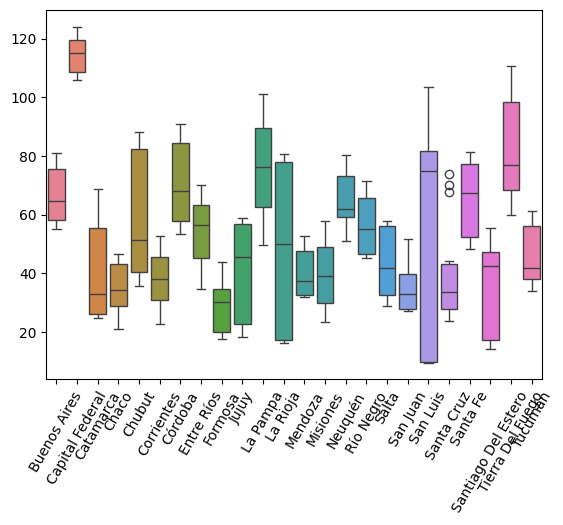

In [222]:
sns.boxplot(data = accesos_hogares, fill = True)
plt.xticks(rotation=60)

#plt.ylim(-20, 50)

##### Con esto, se procede a calcular el KPI para cada provincia: se crea una nueva serie

In [215]:
#------------------------------------
# Creating KPI column for every province
#------------------------------------

"""" A new row with the kpi is created, stored into a new dataframe and then append into the previous one
"""
# provincias = accesos_hogares.columns
n_rows = len(accesos_hogares)

# Creating the inicial dataset ------------------------------------

accesos_hogares_kpi = round(((accesos_hogares.iloc[1] - accesos_hogares.iloc[0])/accesos_hogares.iloc[0])*100, 2)
accesos_hogares_kpi = pd.concat([accesos_hogares_kpi, pd.Series({'datetime':accesos_hogares.index[1]})])

i = 1
while i < n_rows - 1:
     
     new_kpi_row = round(((accesos_hogares.iloc[i+1] - accesos_hogares.iloc[i])/accesos_hogares.iloc[i])*100, 2)
     new_kpi_row = pd.concat([new_kpi_row, pd.Series({'datetime':accesos_hogares.index[i+1]})])

     # concatenate the new row:
     accesos_hogares_kpi = pd.concat([accesos_hogares_kpi, new_kpi_row], axis = 1)

     i += 1

accesos_hogares_kpi = accesos_hogares_kpi.transpose()
accesos_hogares_kpi = accesos_hogares_kpi.set_index('datetime')

    

In [216]:
accesos_hogares_kpi.head(5)

,Buenos Aires,Capital Federal,Catamarca,Chaco,Chubut,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán
datetime,,,,,,,,,,,,,,,,,,,,,
2014-3,3.08,0.58,0.01,0.74,-1.96,0.94,1.47,0.85,1.32,-1.8,...,10.92,1.9,1.07,0.26,-0.07,-3.9,1.66,-1.22,2.07,-0.0
2014-4,-1.16,0.96,3.27,3.59,-0.86,3.4,0.85,2.98,1.04,6.7,...,-6.81,-1.55,1.07,0.66,0.77,-1.52,1.63,4.71,0.69,4.06
2015-1,0.49,0.0,-1.58,21.85,-6.55,22.87,0.0,16.77,0.93,0.46,...,-1.14,-0.33,1.61,-1.73,-0.72,0.69,0.49,-1.24,12.24,-0.69
2015-2,0.77,1.02,1.37,3.06,-2.74,2.19,2.14,2.06,1.31,3.03,...,2.24,1.43,1.5,0.33,-0.08,-3.3,1.86,0.32,0.37,1.74
2015-3,1.56,1.92,1.61,1.82,0.63,1.97,2.17,1.74,2.6,4.85,...,2.79,0.9,2.35,0.08,-0.02,1.97,1.89,0.05,0.47,2.59


In [ ]:
accesos_hogares_kpi.describe()

,Buenos Aires,Capital Federal,Catamarca,Chaco,Chubut,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán
count,40.00,40.0,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,...,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.0
unique,39.00,36.0,40.00,40.00,40.00,39.00,39.00,38.00,39.00,38.00,...,40.00,39.00,39.00,39.00,38.00,39.00,37.00,39.00,40.00,40.0
top,0.25,0.8,0.01,0.74,-1.96,0.56,0.29,1.22,1.45,-0.72,...,10.92,1.21,1.07,-0.09,0.53,0.79,0.46,0.32,2.07,-0.0
freq,2.00,2.0,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,...,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.0


#### Representamos los dato en un diagrama de caja para las distintas provincias:

(-10.0, 10.0)

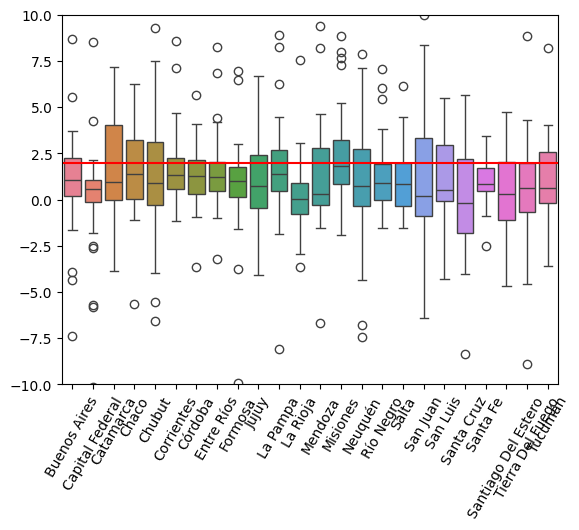

In [223]:
sns.boxplot(data = accesos_hogares_kpi, fill = True)
plt.xticks(rotation=60)
plt.axhline(y=2, color='r', linestyle='-')
plt.ylim(-10, 10)

### Podemos ver que el valor de 'kpi = 2' es un valor que se encuentra dentro del 50% de los datos de cada provincia. 
### Qué pasa si analizamos la distribución de los años más recientes?


Primero se crea una columna quwe contiene el año

In [254]:
accesos_hogares_kpi['Año'] = accesos_hogares_kpi.index.str.split('-', expand = False)

n = np.shape(accesos_hogares_kpi)[0]
i = 0
while i < n:
    
    accesos_hogares_kpi['Año'][i] = accesos_hogares_kpi['Año'][i][0]

    i += 1

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22232\3458938523.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accesos_hogares_kpi['Año'][i] = accesos_hogares_kpi['Año'][i][0]
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_22232\3458938523.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` ins

In [256]:
accesos_hogares_kpi.head(3)

,Buenos Aires,Capital Federal,Catamarca,Chaco,Chubut,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán,Año
datetime,,,,,,,,,,,,,,,,,,,,,
2014-3,3.08,0.58,0.01,0.74,-1.96,0.94,1.47,0.85,1.32,-1.8,...,1.9,1.07,0.26,-0.07,-3.9,1.66,-1.22,2.07,-0.0,2014
2014-4,-1.16,0.96,3.27,3.59,-0.86,3.4,0.85,2.98,1.04,6.7,...,-1.55,1.07,0.66,0.77,-1.52,1.63,4.71,0.69,4.06,2014
2015-1,0.49,0.0,-1.58,21.85,-6.55,22.87,0.0,16.77,0.93,0.46,...,-0.33,1.61,-1.73,-0.72,0.69,0.49,-1.24,12.24,-0.69,2015


#### Realizamos nuevamente el diagrama de caja, pero con los datos  partir del 2017,  que es cuando empezo a haber un crecimiento en las conexiones con fibra óptica:

(-10.0, 10.0)

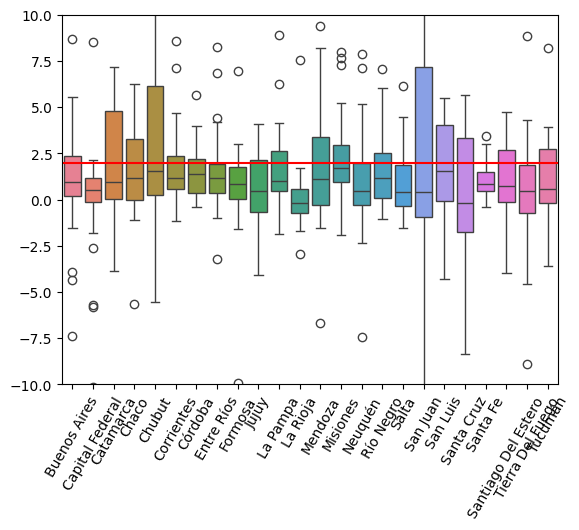

In [ ]:
sns.boxplot(data = accesos_hogares_kpi[accesos_hogares_kpi['Año'] >= '2017'], fill = True)
plt.xticks(rotation=60)
plt.axhline(y=2, color='r', linestyle='-')
plt.ylim(-10, 10)

In [262]:
accesos_hogares_kpi = accesos_hogares_kpi.astype(float)

In [275]:
sub_df_kpi = accesos_hogares_kpi[accesos_hogares_kpi['Año'] >= 2017]
kpi_stats = sub_df_kpi.describe()
kpi_stats = kpi_stats.drop('Año', axis = 1)
kpi_stats

,Buenos Aires,Capital Federal,Catamarca,Chaco,Chubut,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.928667,-0.007667,3.478667,1.458667,3.320667,1.722667,1.534000,1.424333,2.616000,4.215000,...,0.911667,1.521333,1.891667,2.322667,13.132000,4.410667,1.529333,6.347667,2.013667,1.660667
std,2.908720,4.796596,7.519848,2.487307,8.807892,2.203569,1.493179,2.248489,8.273638,18.311093,...,2.941317,3.971167,4.742996,6.654832,46.828328,17.758611,2.989081,28.697167,11.477381,4.190529
min,-7.360000,-13.560000,-11.910000,-5.650000,-24.440000,-1.180000,-0.380000,-3.230000,-9.940000,-4.090000,...,-7.460000,-12.170000,-1.510000,-11.350000,-31.600000,-27.620000,-0.420000,-22.390000,-17.380000,-3.590000
25%,0.175000,-0.147500,0.022500,0.005000,0.272500,0.572500,0.380000,0.365000,0.027500,-0.650000,...,-0.300000,0.077500,-0.352500,-0.922500,-0.087500,-1.755000,0.460000,-0.132500,-0.697500,-0.197500
50%,0.955000,0.500000,0.975000,1.160000,1.565000,1.195000,1.385000,1.145000,0.865000,0.450000,...,0.490000,1.145000,0.395000,0.390000,1.565000,-0.170000,0.830000,0.720000,0.485000,0.555000
75%,2.355000,1.147500,4.807500,3.275000,6.175000,2.375000,2.220000,1.930000,1.740000,2.160000,...,2.002500,2.525000,1.872500,7.190000,4.047500,3.355000,1.505000,2.705000,1.895000,2.755000
max,8.710000,14.480000,25.080000,6.270000,30.020000,8.600000,5.650000,8.270000,37.520000,100.020000,...,7.880000,14.040000,21.690000,20.030000,245.560000,80.360000,16.520000,148.750000,40.500000,20.670000


In [276]:
kpi_stats.iloc[1] #we are looking for the mean

Buenos Aires            0.928667
Capital Federal        -0.007667
Catamarca               3.478667
Chaco                   1.458667
Chubut                  3.320667
Corrientes              1.722667
Córdoba                 1.534000
Entre Ríos              1.424333
Formosa                 2.616000
Jujuy                   4.215000
La Pampa                1.614667
La Rioja                9.034667
Mendoza                 1.794333
Misiones                2.264667
Neuquén                 0.911667
Río Negro               1.521333
Salta                   1.891667
San Juan                2.322667
San Luis               13.132000
Santa Cruz              4.410667
Santa Fe                1.529333
Santiago Del Estero     6.347667
Tierra Del Fuego        2.013667
Tucumán                 1.660667
Name: mean, dtype: float64

In [ ]:
kpi_stats.iloc[1].mean()

2.9641944444444444

## **CONCLUSIONES**
### Podemos concluir que si bien hay grandes variaciones entre cada provincia del KPI mencionado, es posible alcanzar un valor de "2" si se considera el global: el total de las provincias, esto debido a que:

1. Existe una tendencia al aumento de las conexiones (VER PUNTO iii, más adelante)
2. El kpi = 2.96 si se considera desde el año 2017, año en que hubo una mayor demanda por instalaciones de fibra óptica

In [281]:
accesos_hogares_kpi_PoBI = accesos_hogares_kpi*100 #= accesos_hogares_kpi*100.astype(int)
accesos_hogares_kpi_PoBI = accesos_hogares_kpi_PoBI.astype(int)
accesos_hogares_kpi_PoBI

,Buenos Aires,Capital Federal,Catamarca,Chaco,Chubut,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago Del Estero,Tierra Del Fuego,Tucumán,Año
datetime,,,,,,,,,,,,,,,,,,,,,
2014-3,308,57,1,74,-196,94,147,85,132,-180,...,190,107,26,-7,-390,166,-122,206,0,201400
2014-4,-115,96,327,359,-86,340,85,298,104,670,...,-155,107,66,77,-152,163,471,69,405,201400
2015-1,49,0,-158,2185,-655,2287,0,1677,93,46,...,-33,161,-173,-72,69,49,-124,1224,-69,201500
2015-2,77,102,137,306,-274,219,214,206,131,303,...,143,150,33,-8,-330,186,32,37,174,201500
2015-3,156,192,161,182,63,197,217,174,260,484,...,90,235,8,-2,197,189,5,47,259,201500
2015-4,105,-13,145,139,21,56,49,99,121,95,...,11,134,0,-1,50,89,-67,-1122,123,201500
2016-1,-164,-250,-125,-97,-216,-84,-363,-60,-12,-28,...,-130,-88,-121,-123,-317,-252,-470,-95,-91,201600
2016-2,349,424,63,185,9,166,409,204,172,223,...,88,245,4,18,-51,225,-196,286,139,201600
2016-3,136,61,156,111,15,159,121,156,-377,328,...,32,272,-9,28,40,45,-352,180,178,201600


In [282]:
accesos_hogares_kpi_PoBI.to_csv('./PI 2/Penetracion_hogares_kpi.csv')

# **III) TOTALES ACCESOS POR TECNOLOGIA**: 


In [284]:
accesos_por_tec = pd.read_csv('./PI 2/totales_accesos_por_tecnologia.csv', index_col=0, encoding='latin-1')

In [286]:
accesos_por_tec.head(3)

,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
Año,,,,,,,,
2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023


In [288]:
accesos_por_tec.columns

Index([' Trimestre ', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total', ' Periodo '],
      dtype='object')

In [ ]:
accesos_por_tec = accesos_por_tec.drop([' Periodo '], axis = 1)
accesos_por_tec['datetime'] = accesos_por_tec.index.astype(str) + '-' + accesos_por_tec[' Trimestre '].astype(str) 
accesos_por_tec = accesos_por_tec.sort_values(by = 'datetime')
accesos_por_tec = accesos_por_tec.reset_index()

In [331]:
accesos_por_tec.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,datetime
0,2014,1,3697066,2407330,150323,70749,72930,6398398,2014-1
1,2014,2,3708882,2461670,149363,72405,72148,6464468,2014-2
2,2014,3,3714764,2569868,155494,85096,70049,6595271,2014-3
3,2014,4,3764038,2536219,149682,76984,71573,6598496,2014-4
4,2015,1,3756153,2668248,168188,79098,66045,6737732,2015-1


In [385]:
accesos_por_tec = test.copy()

#### SE crea una columna adicional, representando el  % del total que representa

In [386]:
column_names = accesos_por_tec.iloc[:, 2:8].columns

for c in column_names:

    accesos_por_tec[c] = round((accesos_por_tec[c].astype(float)/accesos_por_tec['Total'].astype(float))*100, 2)#.astype(int)


In [387]:
accesos_por_tec.head(5)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,datetime
0,2014,1,57.78,37.62,2.35,1.11,1.14,100.0,2014-1
1,2014,2,57.37,38.08,2.31,1.12,1.12,100.0,2014-2
2,2014,3,56.32,38.97,2.36,1.29,1.06,100.0,2014-3
3,2014,4,57.04,38.44,2.27,1.17,1.08,100.0,2014-4
4,2015,1,55.75,39.60,2.50,1.17,0.98,100.0,2015-1


#### Graficando el avance durante los distintos trimestres:

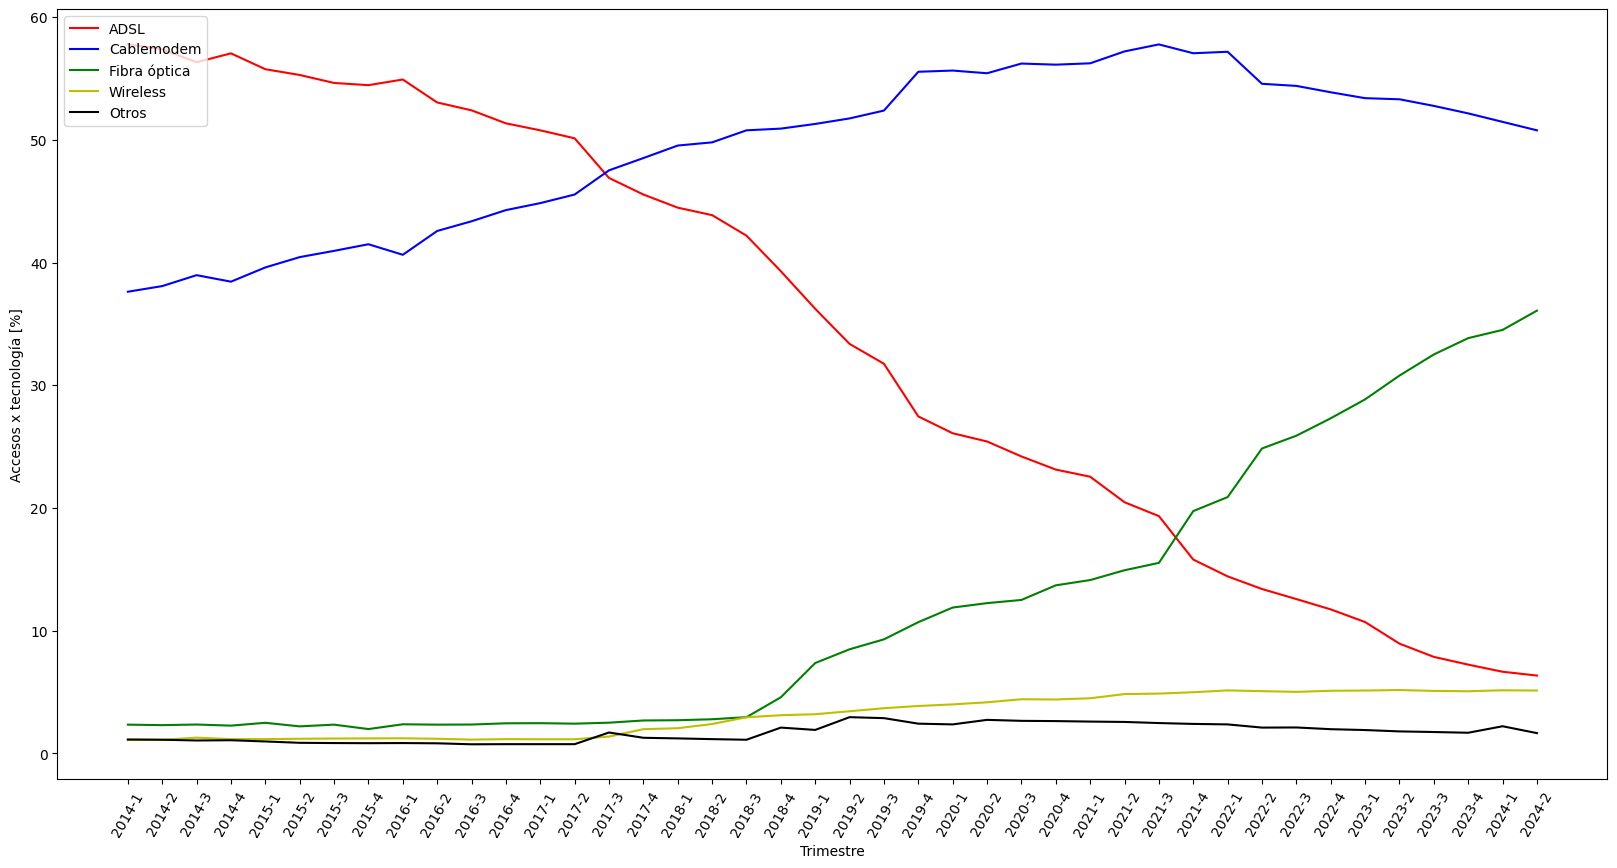

In [367]:
dif_tecnologias = accesos_por_tec[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless','Otros']].columns
n_tecnologias = len(dif_tecnologias)


#-----------------------------------
#Creating a list of different color:
#-----------------------------------
colors = ['r', 'b', 'g', 'y', 'black', 'o']

#-----------------------------------
#Creating the plots
#-----------------------------------

plt.figure(figsize = (20,10)) 

k = 0
while k < n_tecnologias:
    
    value = dif_tecnologias[k]
    colored = colors[k]
    plt.plot(accesos_por_tec['datetime'], accesos_por_tec[value], label = value, color = colored)

    k += 1


plt.xticks(rotation=60)
plt.legend(loc="upper left")
plt.xlabel('Trimestre')
plt.ylabel('Accesos x tecnología [%]')
#plt.ylim(-10,40)

plt.show()

In [502]:
accesos_por_tec.to_csv('./PI 2/accesos_por_tec_porcentaje.csv')

# **IV) ACCESOS POR TECNOLOGÍA POR PROVINCIA**: 

In [503]:
acceso_tec_provincia = pd.read_excel('./PI 2/Internet.xlsx', sheet_name='Accesos Por Tecnología')
acceso_tec_provincia.head(2)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0


In [ ]:
acceso_tec_provincia['Año'] = acceso_tec_provincia['Año'].astype(int)
acceso_tec_provincia['datetime'] = acceso_tec_provincia['Año'].astype(str) + '-' + acceso_tec_provincia['Trimestre'].astype(str)
acceso_tec_provincia = acceso_tec_provincia.sort_values(by = 'datetime')
acceso_tec_provincia.head(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,datetime
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0,2024-2
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0,2024-2
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0,2024-2


In [ ]:
acceso_tec_provincia = acceso_tec_provincia.reset_index()
acceso_tec_provincia = acceso_tec_provincia.drop(['index', 'level_0'], axis = 1)
acceso_tec_provincia.head(5)


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,datetime
0,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0,2014-1
1,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0,2014-1
2,2014,1,Capital Federal,445569.0,820161.0,17767.0,1866.0,14555.0,1299918.0,2014-1
3,2014,1,Catamarca,24126.0,46.0,17.0,0.0,43.0,24232.0,2014-1
4,2014,1,Chaco,52971.0,9497.0,30.0,0.0,58.0,62556.0,2014-1


In [553]:
acceso_tec_provincia = acceso_tec_provincia.groupby(by = ['Provincia']).sum()
acceso_tec_provincia = acceso_tec_provincia.drop(['Año', 'Trimestre', 'datetime'], axis = 1)
acceso_tec_provincia = acceso_tec_provincia.sort_values(by = 'Total', ascending = False)
acceso_tec_provincia

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
Provincia,,,,,,
Buenos Aires,38265791.0,74426357.0,24185799.0,2739492.0,1644828.0,141262267.0
Capital Federal,11387153.0,40429802.0,2500626.0,145057.0,821530.0,55284168.0
Córdoba,10620744.0,14251579.0,5055540.0,1230626.0,289294.0,31447783.0
Santa Fe,10573828.0,12514447.0,3562788.0,924466.0,468428.0,28043957.0
Entre Ríos,3440342.0,3610282.0,648994.0,596609.0,251942.0,8548169.0
Mendoza,4139414.0,1699874.0,2082253.0,476999.0,61075.0,8459615.0
Tucumán,4705513.0,544214.0,2311718.0,58800.0,13362.0,7633607.0
Salta,2384926.0,2393335.0,821053.0,160057.0,147053.0,5906424.0
Misiones,1891172.0,2269932.0,647047.0,159765.0,158161.0,5126077.0


Si comparamos con un gráfico de barras:

<Axes: xlabel='Provincia'>

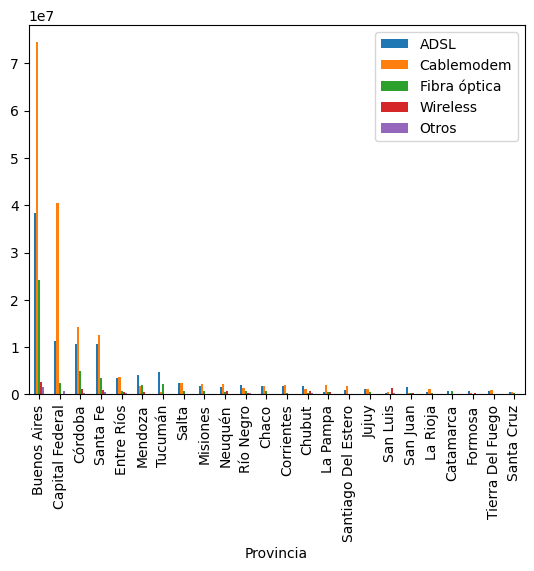

In [555]:
acceso_tec_provincia.iloc[:,0:5].plot.bar()

#### Del grafico de "accesos totales por teconología" del punto previo, vemos que la tecnologia en alza es la de fibra óptica, siendo asi veamos en qué proviencia se encuentra el mayor crecimiento de ésta técnología, considerando todos los años, y se comparará con el resto para ver qué oportunidades hay de seguir ésta tendecia en las otras provincias:

In [556]:
technologies = acceso_tec_provincia.iloc[:, 0:5].columns

for t in technologies:

    acceso_tec_provincia[t] = round((acceso_tec_provincia[t].astype(float)/acceso_tec_provincia['Total'].astype(float))*100, 2)#.astype(int)


#Una vez lograda la matriz de %, la ordenamos con respecto a la Fibra óptica:
acceso_tec_provincia = acceso_tec_provincia.sort_values(by = 'Fibra óptica', ascending = False)
acceso_tec_provincia

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
Provincia,,,,,,
Catamarca,47.10,11.30,37.82,1.15,2.63,1726817.0
Tucumán,61.64,7.13,30.28,0.77,0.18,7633607.0
Mendoza,48.93,20.09,24.61,5.64,0.72,8459615.0
Jujuy,36.17,38.52,18.76,2.00,4.55,2967879.0
Santa Cruz,34.72,28.50,18.22,13.20,5.35,1544763.0
Buenos Aires,27.09,52.69,17.12,1.94,1.16,141262267.0
Chaco,38.69,39.71,16.68,3.57,1.36,4371950.0
Córdoba,33.77,45.32,16.08,3.91,0.92,31447783.0
La Pampa,12.41,57.91,14.95,13.43,1.29,3442426.0


<Axes: xlabel='Provincia'>

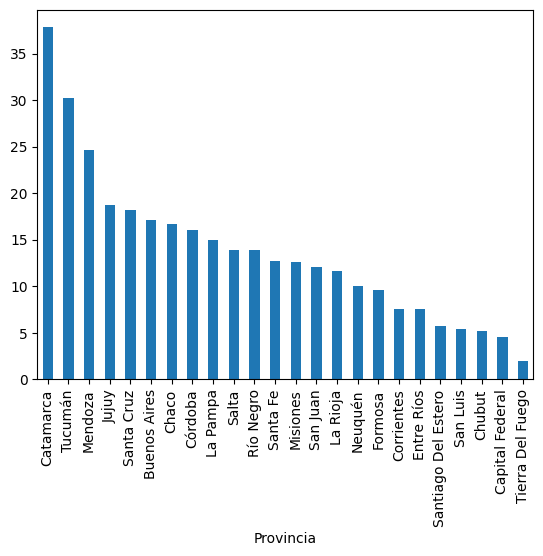

In [557]:
acceso_tec_provincia['Fibra óptica'].plot.bar()

In [560]:
acceso_tec_provincia.astype(int).to_csv('./PI 2/accesos_por_tec_provincia.csv')